# **Implementación Cascadas de Haar**

## Características de Haar
#### El algoritmo de Cascadas de Haar usa filtros restangulares que detectan contrastes de intensidad (claros/oscuros) en la imagen, características típicas de un rostro.
#### * Borde horizontal (Separación frente-cejas)
#### * Borde vertical (Nariz-mejillas)
#### * Rectángulos centrados (Ojos, región oscura sobre fondo claro)
#### * Linea horizontal (Boca)

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

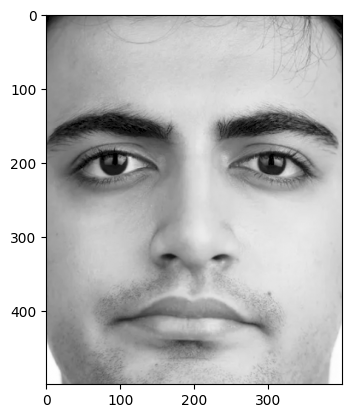

In [2]:
cara = cv.imread("cara.png", cv.IMREAD_GRAYSCALE)
plt.imshow(cara, cmap='gray', vmin=0, vmax=255)
plt.show()

In [58]:
# Crear el kernel 14x7 (Lado derecho 0s y lado izquierdo 1s)
kernel1 = np.zeros((24, 12), dtype=np.uint8)
kernel1[:, 6:] = 1  # Las primeras 3 filas son 1's (6x3=18 elementos, pero ajustamos a 36 1's en total)

# Alternativa: Mitad izquierda 1's, derecha 0's
# kernel[:, :6] = 1  # 6 columnas izquierdas son 1's (6x6=36 elementos)

print("Kernel:\n", kernel1)



# Aplicar dilatación (los 1's "expandirán" los píxeles claros)
imagen_dilatada1 = cv.dilate(cara, kernel1, iterations=1)


Kernel:
 [[0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]]


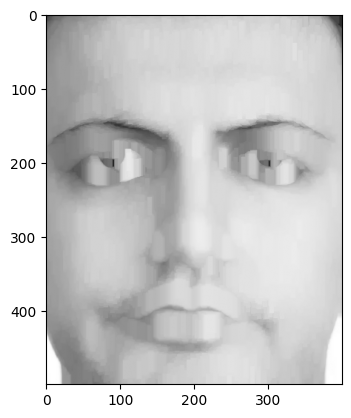

In [59]:
plt.imshow(imagen_dilatada1, cmap='gray', vmin=0, vmax=255)
plt.show()

In [65]:
# Crear el kernel 6x12 (mitad superior 1's, mitad inferior 0's)
kernel2 = np.zeros((19, 8), dtype=np.uint8)
kernel2[9:, :] = 1  # Las primeras 3 filas son 1's (6x3=18 elementos, pero ajustamos a 36 1's en total)

# Alternativa: Mitad izquierda 1's, derecha 0's
# kernel[:, :6] = 1  # 6 columnas izquierdas son 1's (6x6=36 elementos)

print("Kernel:\n", kernel2)



# Aplicar dilatación (los 1's "expandirán" los píxeles claros)
imagen_dilatada2 = cv.dilate(cara, kernel2, iterations=1)

Kernel:
 [[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]


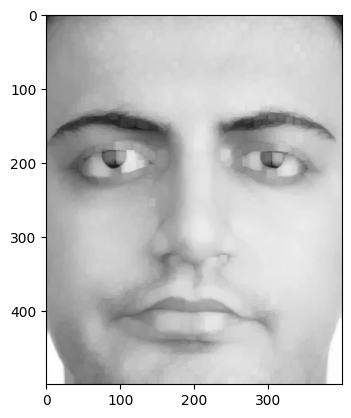

In [66]:
plt.imshow(imagen_dilatada2, cmap='gray', vmin=0, vmax=255)
plt.show()

In [70]:
# Crear el kernel 6x12 (mitad superior 1's, mitad inferior 0's)
kernel3 = np.zeros((8, 12), dtype=np.uint8)
kernel3[:, :4] = 1  # Las primeras 3 filas son 1's (6x3=18 elementos, pero ajustamos a 36 1's en total)
kernel3[:, 8:] = 1

# Alternativa: Mitad izquierda 1's, derecha 0's
# kernel[:, :6] = 1  # 6 columnas izquierdas son 1's (6x6=36 elementos)

print("Kernel:\n", kernel3)



# Aplicar dilatación (los 1's "expandirán" los píxeles claros)
imagen_dilatada3 = cv.dilate(cara, kernel3, iterations=1)

Kernel:
 [[1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 1 1 1]]


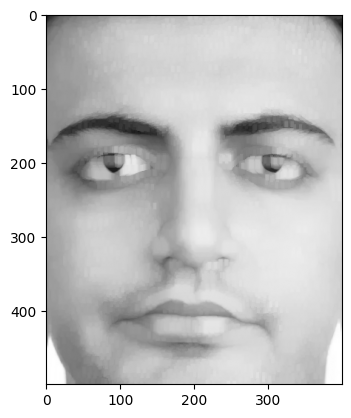

In [71]:
plt.imshow(imagen_dilatada3, cmap='gray', vmin=0, vmax=255)
plt.show()

In [72]:
# Crear el kernel 6x12 (mitad superior 1's, mitad inferior 0's)
kernel4 = np.zeros((24, 12), dtype=np.uint8)
kernel4[:12, :6] = 1  # Las primeras 3 filas son 1's (6x3=18 elementos, pero ajustamos a 36 1's en total)
kernel4[12:, 6:] = 1

# Alternativa: Mitad izquierda 1's, derecha 0's
# kernel[:, :6] = 1  # 6 columnas izquierdas son 1's (6x6=36 elementos)

print("Kernel:\n", kernel4)



# Aplicar dilatación (los 1's "expandirán" los píxeles claros)
imagen_dilatada4 = cv.dilate(cara, kernel4, iterations=1)

Kernel:
 [[1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]]


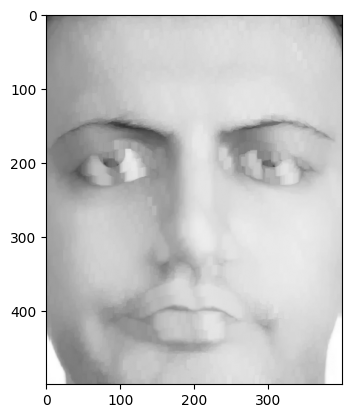

In [73]:
plt.imshow(imagen_dilatada4, cmap='gray', vmin=0, vmax=255)
plt.show()